Analyses properties of decorrelation and whitening methods for decorrelated networks

In [1]:
import numpy as np
import torch
import torch.nn as nn
from decorrelation.decorrelation import Decorrelation, DecorLinear, DecorConv2d
import matplotlib.pyplot as plt
import matplotlib
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader, Subset
from decorrelation.utils import decor_train
import argparse
from decorrelation.plotting import *

# automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/Users/marcel.vangerven/Code/environments/pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Grayscale(1),
        transforms.Normalize((0.5), (0.5)),
        # torch.flatten # not necessary but useful for debugging
        ])

train_data = MNIST(root='~/Data', train=True, download=True, transform=transform)
train_data = Subset(train_data, np.random.permutation(len(train_data.data))[:1000])
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

In [3]:
args = argparse.Namespace(lr=0.0, kappa=1e-2, decor_lr=1e-1, epochs=20)

model = Decorrelation(784, decor_lr=args.decor_lr, kappa=args.kappa).to(device)

lossfun = lambda x, y: nn.Parameter(torch.zeros(1, device=device, dtype=float), requires_grad=True)

res = decor_train(args, model, lossfun, train_loader, device=device)

epoch 0   train:   0.0 decor: 4.05e+06
epoch 1   train:   0.0 decor:   nan
epoch 2   train:   0.0 decor:   nan
epoch 3   train:   0.0 decor:   nan
epoch 4   train:   0.0 decor:   nan
epoch 5   train:   0.0 decor:   nan
epoch 6   train:   0.0 decor:   nan
epoch 7   train:   0.0 decor:   nan
epoch 8   train:   0.0 decor:   nan
epoch 9   train:   0.0 decor:   nan
epoch 10  train:   0.0 decor:   nan
epoch 11  train:   0.0 decor:   nan
epoch 12  train:   0.0 decor:   nan
epoch 13  train:   0.0 decor:   nan
epoch 14  train:   0.0 decor:   nan
epoch 15  train:   0.0 decor:   nan
epoch 16  train:   0.0 decor:   nan
epoch 17  train:   0.0 decor:   nan
epoch 18  train:   0.0 decor:   nan
epoch 19  train:   0.0 decor:   nan
epoch 20  train:   0.0 decor:   nan


/Users/marcel.vangerven/Code/environments/pytorch/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6834: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/marcel.vangerven/Code/environments/pytorch/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6835: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/Users/marcel.vangerven/Code/environments/pytorch/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


layer 1:

mean covariance before decorrelation: 0.56
mean variance before decorrelation: 0.93

mean covariance after decorrelation: nan
mean variance after decorrelation: nan



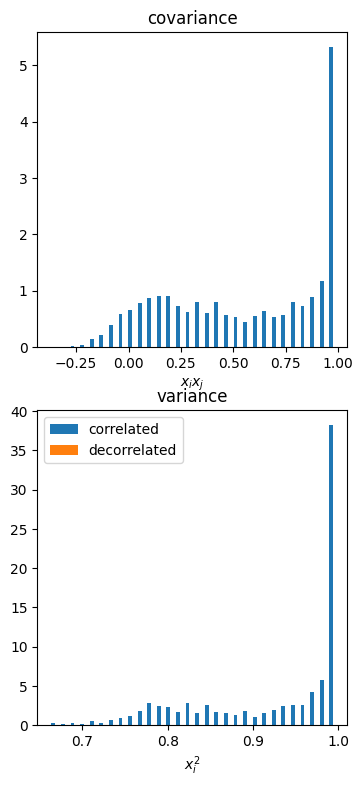

In [4]:
init_model = Decorrelation(784, decor_lr=args.decor_lr, kappa=args.kappa).to(device)
plot_correlations(init_model, model, train_loader, device=device)

In [5]:
args = argparse.Namespace(lr=1e-4, decor_lr=1e-1, kappa=1e-2, epochs=10)

class Model(nn.Sequential):
    def __init__(self, in_features, args):
        super().__init__(DecorLinear(in_features, 10, decor_lr=args.decor_lr, kappa=args.kappa))

    def forward(self, x):
        return super().forward(x.view(len(x), -1))
    
model = Model(784, args).to(device)

lossfun = torch.nn.CrossEntropyLoss().to(device)

res = decor_train(args, model, lossfun, train_loader, device=device)

epoch 0   train:   2.7 decor: 4.05e+06
epoch 1   train:   nan decor:   nan
epoch 2   train:   nan decor:   nan
epoch 3   train:   nan decor:   nan
epoch 4   train:   nan decor:   nan
epoch 5   train:   nan decor:   nan
epoch 6   train:   nan decor:   nan
epoch 7   train:   nan decor:   nan
epoch 8   train:   nan decor:   nan
epoch 9   train:   nan decor:   nan
epoch 10  train:   nan decor:   nan


layer 1:

mean covariance before decorrelation: 0.56
mean variance before decorrelation: 0.92

mean covariance after decorrelation: nan
mean variance after decorrelation: nan



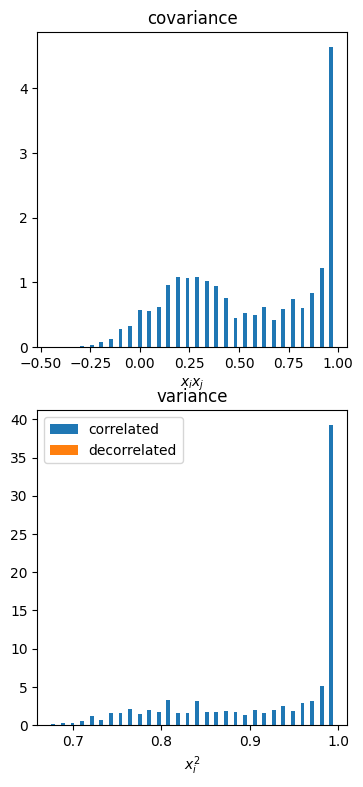

In [6]:
init_model = Model(784, args).to(device)
plot_correlations(init_model, model, train_loader, device=device)

In [7]:
args = argparse.Namespace(lr=1e-4, decor_lr=1e-1, kappa=1e-2, epochs=10)

class Model(nn.Sequential):
    def __init__(self, in_features, args):
        super().__init__(DecorLinear(in_features, 100, decor_lr=args.decor_lr, kappa=args.kappa),
                        nn.LeakyReLU(),
                        DecorLinear(100, 10, decor_lr=args.decor_lr, kappa=args.kappa)
                        )

    def forward(self, x):
        return super().forward(x.view(len(x), -1))

# class Model(nn.Sequential):
#     def __init__(self, in_features, eta, whiten):
#         super().__init__(Decorrelation(in_features, bias=False, eta=eta, whiten=whiten),
#                         nn.BatchNorm1d(in_features),
#                         nn.Linear(in_features, 100),
#                         nn.LeakyReLU(),
#                         Decorrelation(100, bias=False, eta=eta, whiten=whiten),
#                         nn.BatchNorm1d(100),
#                         nn.Linear(100, 10)
#                         )
    
model = Model(784, args).to(device)

lossfun = torch.nn.CrossEntropyLoss().to(device)

res = decor_train(args, model, lossfun, train_loader, device=device)

epoch 0   train:  2.48 decor: 2.02e+06
epoch 1   train:   nan decor:   nan
epoch 2   train:   nan decor:   nan
epoch 3   train:   nan decor:   nan
epoch 4   train:   nan decor:   nan
epoch 5   train:   nan decor:   nan
epoch 6   train:   nan decor:   nan
epoch 7   train:   nan decor:   nan
epoch 8   train:   nan decor:   nan
epoch 9   train:   nan decor:   nan
epoch 10  train:   nan decor:   nan


layer 1:

mean covariance before decorrelation: 0.57
mean variance before decorrelation: 0.93

mean covariance after decorrelation: nan
mean variance after decorrelation: nan

layer 2:

mean covariance before decorrelation: 0.05
mean variance before decorrelation: 0.15

mean covariance after decorrelation: nan
mean variance after decorrelation: nan



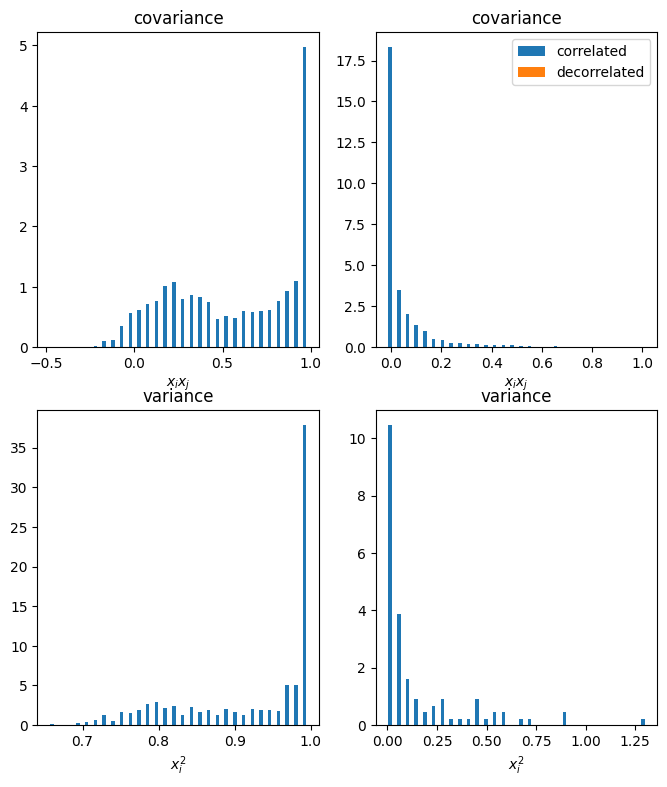

In [8]:
init_model = Model(784, args).to(device)
plot_correlations(init_model, model, train_loader, device=device)